In [1]:
import csv
import ndjson
import os
import sys

In [2]:
base_path = os.getcwd().split('sliver-maestro')[0]
root_path = os.path.join(base_path, "sliver-maestro")
print("root_path: {}".format(root_path))

root_path: C:\Users\ozgur\Desktop\sandbox\sliver-maestro


In [3]:
sys.path.insert(1, root_path)
from src.utils.model_utils import *
from src.draw_model import *
from src.generate_images import *

In [4]:
categories_file = os.path.join(root_path, "src", "data", "categories.csv")

In [5]:
with open(categories_file, newline='') as f:
    reader = csv.reader(f)
    categories = {rows[0]:rows[0] for rows in reader}

#### Select a category to download images from 

In [6]:
for key, value in categories.items():
    #print(key)
    pass

In [7]:
print("Selected category from the list above:")
#category=input()
category='cat'
print(category)

Selected category from the list above:
cat


In [8]:
print("Creating directories to save images, weights and the model ...")
src_list, dst_list, paths_dict = create_folders(root_path, categories, category)

for (src_file, dst_file) in zip(src_list, dst_list): 
    print('src_file: {}, dst_file: {}'.format(src_file, dst_file))

Creating directories to save images, weights and the model ...
C:\Users\ozgur\Desktop\sandbox\sliver-maestro\src\data folder exists...
C:\Users\ozgur\Desktop\sandbox\sliver-maestro\src\save folder exists...
C:\Users\ozgur\Desktop\sandbox\sliver-maestro\src\data\input folder exists...
C:\Users\ozgur\Desktop\sandbox\sliver-maestro\src\data\output folder exists...
C:\Users\ozgur\Desktop\sandbox\sliver-maestro\src\data\output\images folder exists...
C:\Users\ozgur\Desktop\sandbox\sliver-maestro\src\data\output\positions folder exists...
C:\Users\ozgur\Desktop\sandbox\sliver-maestro\src\data\raw folder exists...
C:\Users\ozgur\Desktop\sandbox\sliver-maestro\src\save\cat folder exists...
C:\Users\ozgur\Desktop\sandbox\sliver-maestro\src\data\input\cat folder exists...
C:\Users\ozgur\Desktop\sandbox\sliver-maestro\src\data\raw\cat folder exists...
C:\Users\ozgur\Desktop\sandbox\sliver-maestro\src\data\output\images\cat folder exists...
src_file: gs://quickdraw_dataset/full/numpy_bitmap/cat.np

In [9]:
for (src_file, dst_file) in zip(src_list, dst_list): 
    !gsutil -m cp {src_file} {dst_file}

Copying gs://quickdraw_dataset/full/numpy_bitmap/cat.npy...
/ [0/1 files][    0.0 B/ 92.1 MiB]   0% Done                                    
-
- [0/1 files][  5.4 MiB/ 92.1 MiB]   5% Done                                    
\
|
| [0/1 files][ 13.7 MiB/ 92.1 MiB]  14% Done                                    
/
/ [0/1 files][ 21.4 MiB/ 92.1 MiB]  23% Done                                    
-
\
\ [0/1 files][ 29.1 MiB/ 92.1 MiB]  31% Done                                    
|
/
/ [0/1 files][ 36.6 MiB/ 92.1 MiB]  39% Done                                    
-
- [0/1 files][ 44.6 MiB/ 92.1 MiB]  48% Done                                    
\
|
| [0/1 files][ 52.1 MiB/ 92.1 MiB]  56% Done                                    
/
-
- [0/1 files][ 60.8 MiB/ 92.1 MiB]  66% Done                                    
\
\ [0/1 files][ 69.9 MiB/ 92.1 MiB]  75% Done                                    
|
/
/ [0/1 files][ 78.9 MiB/ 92.1 MiB]  85% Done                                    
-
\
\ [0/1 files]

In [10]:
model_path = os.path.join(paths_dict['input_path'], category, category)

In [11]:
npy_data = np.load(paths_dict['base_input'] + '.npy', allow_pickle=True)

In [12]:
# load from file-like objects
with open(paths_dict['base_raw'] + '.ndjson') as f:
    ndjson_data = ndjson.load(f)

In [13]:
def plot_bitmap():
    print("Bitmap image:")
    plt.imshow(npy_data[int(index)].reshape(28,28))

In [14]:
def plot_raw():
    print("Raw image:")
    i = 0
    for stroke in ndjson_data[int(index)]['drawing']:
        stroke = np.array(stroke)
        plt.plot(stroke[0], stroke[1]*-1)
        i += 1
    print('There are', i, 'number of strokes in this raw image file!')

There are  123203  images in selected category cat
Select an index value from 0 to 123202 to display and compare bitmap and raw images:
Bitmap image:


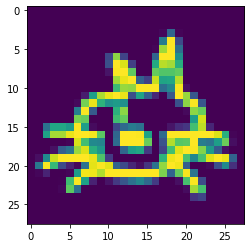

Raw image:
There are 9 number of strokes in this raw image file!


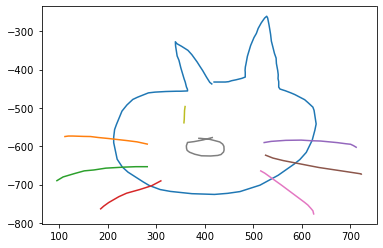

In [15]:
print('There are ', len(npy_data)+1, ' images in selected category', categories[category])
print("Select an index value from 0 to", len(npy_data), "to display and compare bitmap and raw images:")
#index=input()
index='0'
plot_bitmap()
plt.show()
plot_raw()

In [16]:
# TRAIN TEST SPLIT
filepath = paths_dict['input_path']
x_train, x_test, y_train, y_test = split_data(filepath, categories[category], shuffle=False)

In [17]:
DRAW(model_path, category)

DRAW(
  (encoder): LSTMCell(306, 256)
  (mu_linear): Linear(in_features=256, out_features=10, bias=True)
  (sigma_linear): Linear(in_features=256, out_features=10, bias=True)
  (decoder): LSTMCell(10, 256)
  (dec_linear): Linear(in_features=256, out_features=5, bias=True)
  (dec_w_linear): Linear(in_features=256, out_features=25, bias=True)
  (sigmoid): Sigmoid()
)

In [18]:
# TRAINING AND TESTING

#train_data = Dataset(x_train)
#test_data = Dataset(x_test)



model = DRAW(category)
print("training...")
model.start(phase='train') 



training...


C:\Users\ozgur\Desktop\sandbox\sliver-maestro\src\draw_model.py:210: UserWarning: torch.nn.utils.clip_grad_norm is now deprecated in favor of torch.nn.utils.clip_grad_norm_.
  torch.nn.utils.clip_grad_norm(self.parameters(), self.clip)


Phase: train | Epoch: 0 | Count: 100 \ Start Time: 12:20:47 | Loss: 354
Phase: train | Epoch: 0 | Count: 200 \ Start Time: 12:21:21 | Loss: 327
Phase: train | Epoch: 0 | Count: 300 \ Start Time: 12:21:56 | Loss: 319
Phase: train | Epoch: 0 | Count: 400 \ Start Time: 12:22:34 | Loss: 309
Phase: train | Epoch: 0 | Count: 500 \ Start Time: 12:23:11 | Loss: 307
Phase: train | Epoch: 0 | Count: 600 \ Start Time: 12:23:49 | Loss: 308
Phase: train | Epoch: 0 | Count: 700 \ Start Time: 12:24:27 | Loss: 305
Phase: train | Epoch: 0 | Count: 800 \ Start Time: 12:25:04 | Loss: 300
Phase: train | Epoch: 0 | Count: 900 \ Start Time: 12:25:41 | Loss: 300
Phase: train | Epoch: 0 | Count: 1000 \ Start Time: 12:26:20 | Loss: 294
Phase: train | Epoch: 0 | Count: 1100 \ Start Time: 12:26:55 | Loss: 294
Phase: train | Epoch: 0 | Count: 1200 \ Start Time: 12:27:31 | Loss: 291
Phase: train | Epoch: 0 | Count: 1300 \ Start Time: 12:28:05 | Loss: 291
Phase: train | Epoch: 0 | Count: 1400 \ Start Time: 12:28:39

Phase: train | Epoch: 7 | Count: 11400 \ Start Time: 13:27:41 | Loss: 243
Phase: train | Epoch: 7 | Count: 11500 \ Start Time: 13:28:16 | Loss: 242
Phase: train | Epoch: 7 | Count: 11600 \ Start Time: 13:28:51 | Loss: 242
Phase: train | Epoch: 7 | Count: 11700 \ Start Time: 13:29:28 | Loss: 241
Phase: train | Epoch: 7 | Count: 11800 \ Start Time: 13:30:03 | Loss: 241
Phase: train | Epoch: 7 | Count: 11900 \ Start Time: 13:30:39 | Loss: 241
Phase: train | Epoch: 7 | Count: 12000 \ Start Time: 13:31:16 | Loss: 241
Phase: train | Epoch: 7 | Count: 12100 \ Start Time: 13:31:52 | Loss: 242
Phase: train | Epoch: 7 | Count: 12200 \ Start Time: 13:32:28 | Loss: 240
Phase: train | Epoch: 7 | Count: 12300 \ Start Time: 13:33:05 | Loss: 241
Phase: train | Epoch: 8 | Count: 12400 \ Start Time: 13:33:42 | Loss: 240
Phase: train | Epoch: 8 | Count: 12500 \ Start Time: 13:34:18 | Loss: 240
Phase: train | Epoch: 8 | Count: 12600 \ Start Time: 13:34:55 | Loss: 242
Phase: train | Epoch: 8 | Count: 12700

## Generating Images

In [19]:
test_model = Test(category)

reconstructing images...
C:\Users\ozgur\Desktop\sandbox\sliver-maestro\src\data\output\images\cat\cat_test_0.png
C:\Users\ozgur\Desktop\sandbox\sliver-maestro\src\data\output\images\cat\cat_test_1.png
C:\Users\ozgur\Desktop\sandbox\sliver-maestro\src\data\output\images\cat\cat_test_2.png
C:\Users\ozgur\Desktop\sandbox\sliver-maestro\src\data\output\images\cat\cat_test_3.png
C:\Users\ozgur\Desktop\sandbox\sliver-maestro\src\data\output\images\cat\cat_test_4.png
C:\Users\ozgur\Desktop\sandbox\sliver-maestro\src\data\output\images\cat\cat_test_5.png
C:\Users\ozgur\Desktop\sandbox\sliver-maestro\src\data\output\images\cat\cat_test_6.png
C:\Users\ozgur\Desktop\sandbox\sliver-maestro\src\data\output\images\cat\cat_test_7.png
C:\Users\ozgur\Desktop\sandbox\sliver-maestro\src\data\output\images\cat\cat_test_8.png
C:\Users\ozgur\Desktop\sandbox\sliver-maestro\src\data\output\images\cat\cat_test_9.png


array([[5.00000000e-01, 5.00000000e-01, 5.00000000e-01, 5.00000000e-01,
        5.00000000e-01, 5.00000000e-01, 5.00000000e-01, 5.00000000e-01,
        5.00000000e-01, 5.00000000e-01, 5.00000000e-01, 5.00000000e-01,
        5.00000000e-01, 5.00000000e-01, 5.00000000e-01, 5.00000000e-01,
        5.00000000e-01, 5.00000000e-01, 5.00000000e-01, 5.00000000e-01,
        5.00000000e-01, 5.00000000e-01, 5.00000000e-01, 5.00000000e-01,
        5.00000000e-01, 5.00000000e-01, 5.00000000e-01, 5.00000000e-01,
        5.00000000e-01, 5.00000000e-01],
       [5.00000000e-01, 0.00000000e+00, 0.00000000e+00, 2.99491997e-35,
        4.95218724e-25, 1.11129699e-19, 4.50202379e-17, 1.12594779e-16,
        3.25144164e-18, 2.78022088e-21, 2.10996700e-25, 4.20970745e-30,
        9.23887821e-35, 1.99675670e-38, 0.00000000e+00, 8.09234589e-39,
        3.62142087e-35, 4.35458591e-30, 9.69998160e-25, 6.14205968e-20,
        3.62470412e-16, 8.30557276e-14, 3.62135127e-13, 2.66451730e-14,
        6.69638837e-17,

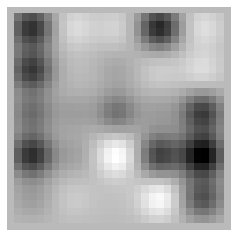

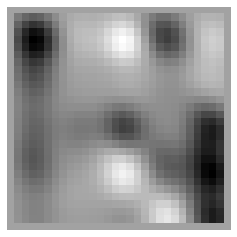

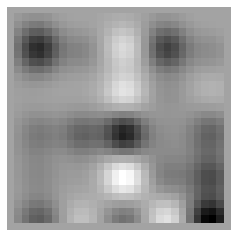

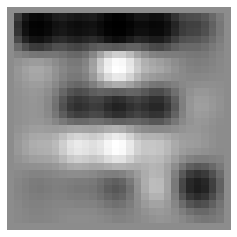

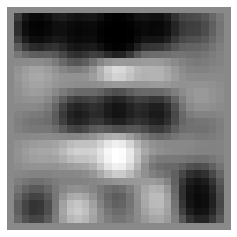

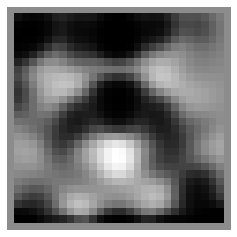

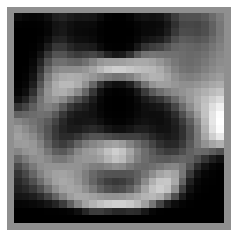

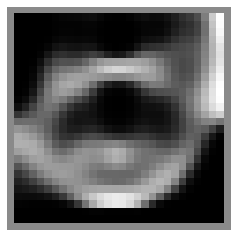

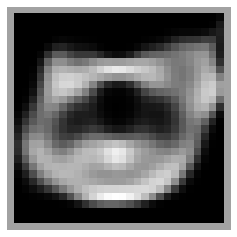

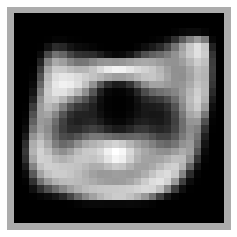

In [20]:
img_loc = {'startr': 0, 'endr': 30, 'startc': 0, 'endc': 30}
## MC: Check the remaining shuffling operations
print("reconstructing images...")
test_model.xrecons_grid(img_loc)